In [2]:
import pandas as pd
import numpy as np
import xgboost as xgb
import pickle
from sklearn import datasets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [3]:
# reading the features and the labels
df= pd.read_csv(r'D:\ML course practise\intern\Knight ML Assignment\Data\test.csv')

In [4]:
df.head()

user_name    country                                       review_title  \
0   @paulgwine          US  Boedecker Cellars 2011 Athena Pinot Noir (Will...   
1   @wineschach  Argentina  Mendoza Vineyards 2012 Gran Reserva by Richard...   
2       @vboone         US                Prime 2013 Chardonnay (Coombsville)   
3   @wineschach  Argentina  Bodega Cuarto Dominio 2012 Chento Vineyard Sel...   
4  @kerinokeefe      Italy           SassodiSole 2012  Brunello di Montalcino   

                                  review_description  \
0  Nicely differentiated from the companion Stewa...   
1  Charred, smoky, herbal aromas of blackberry tr...   
2  Slightly sour and funky in earth, this is a re...   
3  This concentrated, midnight-black Malbec deliv...   
4  Earthy aromas suggesting grilled porcini, leat...   

                      designation  points  price          province  \
0                          Athena      88   35.0            Oregon   
1  Gran Reserva by Richard Bonvin      90   60.0  Mendoza Province   
2                             NaN      87   38.0        California   
3       Chento Vineyard Selection      91   20.0  Mendoza Province   
4                             NaN      90   49.0           Tuscany   

                 region_1           region_2                 winery  
0       Willamette Valley  Willamette Valley      Boedecker Cellars  
1                 Mendoza                NaN      Mendoza Vineyards  
2             Coombsville               Napa                  Prime  
3                 Mendoza                NaN  Bodega Cuarto Dominio  
4  Brunello di Montalcino                NaN            SassodiSole

In [5]:
df.isnull().sum()

user_name              4738
country                   4
review_title              0
review_description        0
designation            5989
points                    0
price                  1394
province                  4
region_1               3314
region_2              11751
winery                    0
dtype: int64

In [6]:
df.drop(['user_name','review_title','review_description'],axis=1,inplace=True)

In [7]:
df.head()

country                     designation  points  price          province  \
0         US                          Athena      88   35.0            Oregon   
1  Argentina  Gran Reserva by Richard Bonvin      90   60.0  Mendoza Province   
2         US                             NaN      87   38.0        California   
3  Argentina       Chento Vineyard Selection      91   20.0  Mendoza Province   
4      Italy                             NaN      90   49.0           Tuscany   

                 region_1           region_2                 winery  
0       Willamette Valley  Willamette Valley      Boedecker Cellars  
1                 Mendoza                NaN      Mendoza Vineyards  
2             Coombsville               Napa                  Prime  
3                 Mendoza                NaN  Bodega Cuarto Dominio  
4  Brunello di Montalcino                NaN            SassodiSole

In [8]:
data=df

In [9]:
data['region_2']=data['region_2'].fillna(data['region_2'].mode()[0])
data['price']=data['price'].fillna(data['price'].mean())
data['region_1']=data['region_1'].fillna(data['region_1'].mode()[0])
data['province']=data['province'].fillna(data['province'].mode()[0])
data['designation']=data['designation'].fillna(data['designation'].mode()[0])

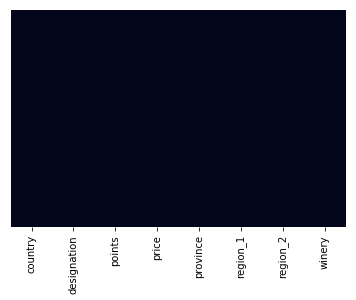

In [11]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [12]:
def Encode(d):
    for column in data.columns[~data.columns.isin(['points', 'price'])]:
        data[column] = data[column].factorize()[0]
    return data

zomato_en = Encode(data.copy())
zomato_en.head() # looking at the

country  designation  points  price  province  region_1  region_2  winery
0        0            0      88   35.0         0         0         0       0
1        1            1      90   60.0         1         1         1       1
2        0            2      87   38.0         2         2         2       2
3        1            3      91   20.0         1         1         1       3
4        2            2      90   49.0         3         3         1       4

In [13]:
df.to_csv(r'D:\ML course practise\intern\Knight ML Assignment\Data\filized_testdata.csv')

In [14]:
test_df=pd.read_csv(r'D:\ML course practise\intern\Knight ML Assignment\Data\filized_testdata.csv')

In [ ]:
z=a.predict(test_df)